# Practica Machine Learning - Maximo Lloris

## Cargo librerias

In [1]:
import numpy  as np  
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Carga de datos

In [3]:
airbnb_data = pd.read_csv("airbnb-listings-extract.csv", delimiter=";") # cargamos fichero
print(airbnb_data.shape)
airbnb_data.head(5).T
# Mostrar todas las columnas y filas sin truncar
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

(14780, 89)


In [4]:
# Me quedo unicamente con los datos de Madrid
airbnb_data = airbnb_data[airbnb_data['City'] == 'Madrid']
airbnb_data['City'].nunique()

1

In [5]:
# Coloco la variable objetivo en primera posición

# Lista de columnas
cols = list(airbnb_data.columns)

# Muevo la columna 'Price' al inicio
cols.insert(0, cols.pop(cols.index('Price')))

# Reorganizo el DataFrame con las nuevas posiciones de las columnas
airbnb_data = airbnb_data[cols]

## Divido entre train y test 

In [6]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(airbnb_data, test_size=0.2, shuffle=True, random_state=42)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos
train.to_csv('airbnb-listings-extract_train.csv', sep=';', decimal='.', index=False)
test.to_csv('airbnb-listings-extract_test.csv', sep=';', decimal='.', index=False)

# A partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él. 

airbnb_data_train = pd.read_csv('airbnb-listings-extract_train.csv', sep=';', decimal='.')
airbnb_data_train.head(5).T

Dimensiones del dataset de training: (10565, 89)
Dimensiones del dataset de test: (2642, 89)


,0,1,2,3,4
Price,25.0,33.0,20.0,70.0,85.0
ID,3107828,13768235,9600621,1052457,2156218
Listing Url,https://www.airbnb.com/rooms/3107828,https://www.airbnb.com/rooms/13768235,https://www.airbnb.com/rooms/9600621,https://www.airbnb.com/rooms/1052457,https://www.airbnb.com/rooms/2156218
Scrape ID,20170407214119,20170407214119,20170407214119,20170407214119,20170407214119
Last Scraped,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08
...,...,...,...,...,...
Cancellation Policy,strict,moderate,moderate,strict,strict
Calculated host listings count,2.0,2.0,1.0,5.0,40.0
Reviews per Month,2.36,0.66,3.71,0.81,0.39
Geolocation,"40.4334523506,-3.71725158733","40.4310543128,-3.67383928765","40.4314861379,-3.61739682264","40.4090437312,-3.70260381146","40.415776874,-3.70784637249"


## Analisis exploratorio

In [7]:
airbnb_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10565 entries, 0 to 10564
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Price                           10557 non-null  float64
 1   ID                              10565 non-null  int64  
 2   Listing Url                     10565 non-null  object 
 3   Scrape ID                       10565 non-null  int64  
 4   Last Scraped                    10565 non-null  object 
 5   Name                            10565 non-null  object 
 6   Summary                         10164 non-null  object 
 7   Space                           7736 non-null   object 
 8   Description                     10559 non-null  object 
 9   Experiences Offered             10565 non-null  object 
 10  Neighborhood Overview           6635 non-null   object 
 11  Notes                           4033 non-null   object 
 12  Transit                         

In [8]:
airbnb_data_train.describe()

,Price,ID,Scrape ID,Host ID,Host Response Rate,Host Acceptance Rate,Host Listings Count,Host Total Listings Count,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Square Feet,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Jurisdiction Names,Calculated host listings count,Reviews per Month
count,10557.000000,1.056500e+04,1.056500e+04,1.056500e+04,9249.000000,0.0,10563.000000,10563.000000,10565.000000,10565.000000,10565.000000,10523.000000,10550.000000,10525.000000,408.000000,2641.000000,2619.000000,4508.000000,6234.000000,10565.000000,10565.000000,10565.000000,10565.000000,0.0,10565.000000,10565.000000,10565.000000,10565.000000,10565.000000,8292.000000,8277.000000,8282.000000,8269.000000,8282.000000,8267.000000,8268.000000,0.0,10565.00000,8385.000000
mean,66.036942,1.042695e+07,2.017041e+13,3.753193e+07,94.812520,NaN,9.823724,9.823724,40.420661,-3.697029,3.189210,1.254158,1.292796,1.982993,384.656863,370.391897,1365.250095,183.769965,29.635547,1.574728,7.374728,3.069569,872.261713,NaN,8.653195,22.808708,39.984193,205.469664,22.979460,91.632176,9.408361,9.334823,9.617487,9.642598,9.544817,9.214441,NaN,7.68566,1.919667
std,56.198644,5.498464e+06,4.336143e+00,3.442889e+07,15.331751,NaN,27.723634,27.723634,0.020019,0.023383,2.006728,0.600759,0.829620,1.514593,567.349019,193.315692,1029.600757,109.579790,26.337892,1.082906,11.032316,14.063852,1779.433240,NaN,8.997335,19.376133,29.171178,127.148494,38.203622,9.087496,0.935946,0.994159,0.804191,0.760872,0.768524,0.958608,NaN,19.92670,1.869452
min,9.000000,2.151200e+04,2.017041e+13,1.745300e+04,0.000000,NaN,0.000000,0.000000,40.331888,-3.835498,1.000000,0.000000,0.000000,1.000000,0.000000,70.000000,250.000000,70.000000,4.000000,1.000000,0.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,NaN,1.00000,0.020000
25%,31.000000,5.876946e+06,2.017041e+13,7.696081e+06,100.000000,NaN,1.000000,1.000000,40.410154,-3.707741,2.000000,1.000000,1.000000,1.000000,0.000000,200.000000,700.000000,100.000000,15.000000,1.000000,0.000000,1.000000,365.000000,NaN,0.000000,5.000000,13.000000,83.000000,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,1.00000,0.480000
50%,52.000000,1.156183e+07,2.017041e+13,2.750826e+07,100.000000,NaN,2.000000,2.000000,40.418756,-3.701494,2.000000,1.000000,1.000000,1.000000,98.500000,350.000000,1200.000000,150.000000,25.000000,1.000000,0.000000,2.000000,1125.000000,NaN,6.000000,20.000000,38.000000,248.000000,7.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,2.00000,1.280000
75%,80.000000,1.534504e+07,2.017041e+13,5.763363e+07,100.000000,NaN,5.000000,5.000000,40.427901,-3.693724,4.000000,1.000000,2.000000,2.000000,646.000000,490.000000,1700.000000,200.000000,35.000000,2.000000,14.000000,3.000000,1125.000000,NaN,13.000000,38.000000,65.000000,321.000000,28.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,4.00000,2.910000
max,875.000000,1.810918e+07,2.017041e+13,1.247534e+08,100.000000,NaN,265.000000,265.000000,40.514247,-3.575142,16.000000,8.000000,10.000000,16.000000,5167.000000,980.000000,25000.000000,950.000000,500.000000,15.000000,276.000000,1125.000000,100000.000000,NaN,30.000000,60.000000,90.000000,365.000000,446.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,145.00000,17.210000


In [9]:
pd.set_option('display.max_row', None)
airbnb_data_train.isna().sum()

Price                                 8
ID                                    0
Listing Url                           0
Scrape ID                             0
Last Scraped                          0
Name                                  0
Summary                             401
Space                              2829
Description                           6
Experiences Offered                   0
Neighborhood Overview              3930
Notes                              6532
Transit                            3952
Access                             4529
Interaction                        4562
House Rules                        3709
Thumbnail Url                      1977
Medium Url                         1977
Picture Url                          15
XL Picture Url                     1977
Host ID                               0
Host URL                              0
Host Name                             2
Host Since                            2
Host Location                        32


### Impresiones tras primera exploración

Nuestros datos tienen muchas variables que no son de valor numérico. Tendré que determinar si son relevantes y en el caso de que lo sean codificarlas más adelante.

Algunas de las columnas tienen valor máximos muy superiores al tercer cuartil (Q3) lo que puede ser un indicador de outliers

También podemos observar que muchas de las variables tienen una gran cantidad de valores nulos por lo que muy posiblemente tengamos que descartar las que columnas que tengan un número elevado de datos faltantes.


In [10]:
#Reviso las columnas que no sean tipo int o float
columns_object = airbnb_data_train.select_dtypes(include=[np.number, 'object'])
columns_object.head(5).T

,0,1,2,3,4
Price,25.0,33.0,20.0,70.0,85.0
ID,3107828,13768235,9600621,1052457,2156218
Listing Url,https://www.airbnb.com/rooms/3107828,https://www.airbnb.com/rooms/13768235,https://www.airbnb.com/rooms/9600621,https://www.airbnb.com/rooms/1052457,https://www.airbnb.com/rooms/2156218
Scrape ID,20170407214119,20170407214119,20170407214119,20170407214119,20170407214119
Last Scraped,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08
Name,HABITACIÓN MADRID -MONCLOA,Cosy room in 100m2 flat with terrace,Near airport-Small 6m2 Bed room with full(double),BEDROOM LOOKING ONTO A NICE PATIO,GRANT II Plaza Mayor
Summary,ALQUILO HABITACIÓN EN LA ZONA DE MONCLOA. A 1 ...,Large and cosy room (with AC) with direct acce...,"The bedroom have 6m2,located in last floor of ...",This apartment is perfectly equipped for holid...,NaN
Space,It is a very quite house and very well linked....,"Bright, new and large flat in one of the best ...",The bedroom have 6 squared meters and is very ...,This apartment is perfectly equipped for holid...,Beautiful and charming apartment recently deco...
Description,It is a very quite house and very well linked....,Large and cosy room (with AC) with direct acce...,"The bedroom have 6m2,located in last floor of ...",This apartment is perfectly equipped for holid...,Beautiful and charming apartment recently deco...
Experiences Offered,none,none,none,none,none


In [11]:
airbnb_data_train['Zipcode'].unique()

array(['28015', '28006', '28037', '28012', '28013', '28039', '28005',
       '28028', '28009', '28020', '28004', nan, '28007', '28045', '28001',
       '28003', '28008', '28030', '28022', '28054', '28025', '28016',
       '28011', '28010', '28047', '28014', '28019', '28026', '28017',
       '28027', '28053', '28050', '28021', '28032', '28002', '28042',
       '28041', '28038', '28046', '28034', '28029', '28044', '28018',
       '28031', '28024', '28023', '28035', '28033', '28051', '28043',
       '28036', '27004', '25008', '28040', '28049', 'Madrid 28004',
       '280013', '2815', '20013', '28055', '28002\n28002', '28', '28052',
       '2804', '2805', '28048', '28060', 28016.0, 28012.0, 28028.0,
       28005.0, 28004.0, 28001.0, 28015.0, 28031.0, 28013.0, 28045.0,
       28014.0, 28043.0, 28051.0, 28042.0, 28009.0, 28024.0, 28038.0,
       28034.0, 28006.0, 28010.0, 28008.0, 28053.0, 28017.0, 28003.0,
       28054.0, 28026.0, 28019.0, 28007.0, 28020.0, 28011.0, 28041.0,
       28027.0,

In [12]:
airbnb_data_train['Neighbourhood Group Cleansed'].nunique()

21

### Selección de columnas

Tras revisar las columnas tipo object decido eliminar la gran mayoría por tratarse de columnas de texto libre.

Otras columnas sin embargo, las conservo para tratarlas posteriormente por que puedan tener relevancia como pueda ser Property type, Room type.

En cuanto a las columnas que hacen referencia al Neighbourhood finalmente decido quedarme unicamente con Neighbourhood Group Cleansed dado que parece agrupar todos los registros de Madrid en 21 barrios distintos y ademas no tiene nulos.

In [13]:
#Tras revisar las columnas type = object decido eliminar las siguientes
columns_to_drop = ['ID','Listing Url','Scrape ID','Last Scraped','Name','Summary','Space','Description','Experiences Offered',
                   'Neighborhood Overview','Notes','Transit','Access','Interaction','House Rules','Thumbnail Url','Medium Url',
                   'Picture Url','XL Picture Url','Host ID','Host URL','Host Name','Host Since','Host Location', 'Host About',
                   'Host Response Time','Host Response Rate','Host Acceptance Rate','Host Thumbnail Url','Host Picture Url',
                   'Host Neighbourhood','Host Listings Count','Host Total Listings Count','Host Verifications','Street',
                   'Neighbourhood','Neighbourhood Cleansed','City','State','Zipcode','Market','Smart Location','Country Code',
                   'Country','Amenities','Calendar Updated','Calendar last Scraped','First Review','Last Review','License',
                   'Jurisdiction Names','Geolocation','Features']

In [14]:
airbnb_data_train = airbnb_data_train.drop(columns=columns_to_drop)

In [15]:
pd.set_option('display.max_columns', None)


In [16]:
#Hago un recuento de valores NaN de cada columna
pd.set_option('display.max_columns', None)
airbnb_data_train.isna().sum()

Price                                 8
Neighbourhood Group Cleansed          0
Latitude                              0
Longitude                             0
Property Type                         0
Room Type                             0
Accommodates                          0
Bathrooms                            42
Bedrooms                             15
Beds                                 40
Bed Type                              0
Square Feet                       10157
Weekly Price                       7924
Monthly Price                      7946
Security Deposit                   6057
Cleaning Fee                       4331
Guests Included                       0
Extra People                          0
Minimum Nights                        0
Maximum Nights                        0
Has Availability                  10565
Availability 30                       0
Availability 60                       0
Availability 90                       0
Availability 365                      0


### Elimino columnas por exceso de valores nulos

Estas columnas presentaban un gran número de datos faltantes por lo que decido eliminarlas 

In [17]:
# Decido eliminar columnas que tiene exceso de NaN
airbnb_data_train = airbnb_data_train.drop(columns = 'Has Availability')
airbnb_data_train = airbnb_data_train.drop(columns = 'Square Feet')
airbnb_data_train = airbnb_data_train.drop(columns = 'Weekly Price')
airbnb_data_train = airbnb_data_train.drop(columns = 'Monthly Price')

In [18]:
# Elimino los 9 registros de que no tienen valor para la columna price
airbnb_data_train = airbnb_data_train.dropna(subset=["Price"])
airbnb_data_train.isna().sum()

Price                                0
Neighbourhood Group Cleansed         0
Latitude                             0
Longitude                            0
Property Type                        0
Room Type                            0
Accommodates                         0
Bathrooms                           41
Bedrooms                            15
Beds                                39
Bed Type                             0
Security Deposit                  6051
Cleaning Fee                      4328
Guests Included                      0
Extra People                         0
Minimum Nights                       0
Maximum Nights                       0
Availability 30                      0
Availability 60                      0
Availability 90                      0
Availability 365                     0
Number of Reviews                    0
Review Scores Rating              2268
Review Scores Accuracy            2283
Review Scores Cleanliness         2278
Review Scores Checkin    

In [19]:
airbnb_data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10557 entries, 0 to 10564
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Price                           10557 non-null  float64
 1   Neighbourhood Group Cleansed    10557 non-null  object 
 2   Latitude                        10557 non-null  float64
 3   Longitude                       10557 non-null  float64
 4   Property Type                   10557 non-null  object 
 5   Room Type                       10557 non-null  object 
 6   Accommodates                    10557 non-null  int64  
 7   Bathrooms                       10516 non-null  float64
 8   Bedrooms                        10542 non-null  float64
 9   Beds                            10518 non-null  float64
 10  Bed Type                        10557 non-null  object 
 11  Security Deposit                4506 non-null   float64
 12  Cleaning Fee                    6229 

## Visualizaciones

### ProfileReport

In [20]:
# Instalación si es necesario
#!pip install ipywidgets
#!pip install ydata-profiling==4.7.0

In [21]:
#!pip install ydata-profiling[notebook]

In [22]:
#from ydata_profiling import ProfileReport
#ProfileReport(airbnb_data_train)

### Histograma

#### Transformación de Price

In [23]:
# Convierto Price a logaritmico

airbnb_data_train['Price_log'] = np.log(airbnb_data_train['Price'])

# Coloco la variable objetivo en primera posición

# Lista de columnas
cols = list(airbnb_data_train.columns)

# Muevo la columna 'Price' al inicio
cols.insert(0, cols.pop(cols.index('Price_log')))

# Reorganizo el DataFrame con las nuevas posiciones de las columnas
airbnb_data_train = airbnb_data_train[cols]

In [24]:
# Convierto Price a Price^2

airbnb_data_train['Price_sqrt'] = np.sqrt(airbnb_data_train['Price'])

# Coloco la variable objetivo en primera posición

# Lista de columnas
cols = list(airbnb_data_train.columns)

# Muevo la columna 'Price' al inicio
cols.insert(0, cols.pop(cols.index('Price_sqrt')))

# Reorganizo el DataFrame con las nuevas posiciones de las columnas
airbnb_data_train = airbnb_data_train[cols]

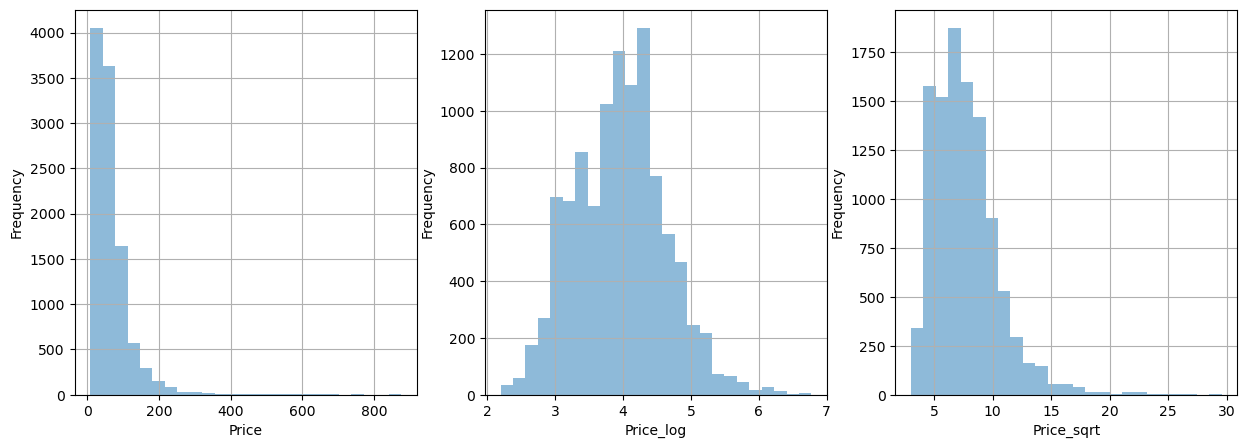

In [25]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
airbnb_data_train['Price'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Price')

plt.subplot(1,3,2)
airbnb_data_train['Price_log'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Price_log')

plt.subplot(1,3,3)
airbnb_data_train['Price_sqrt'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Price_sqrt')

plt.show()

##### **Conclusión**

Al ver el histograma de Price, Price_log y Price_sqrt decido quedamos con la variable Price_log

### Scatter Plot

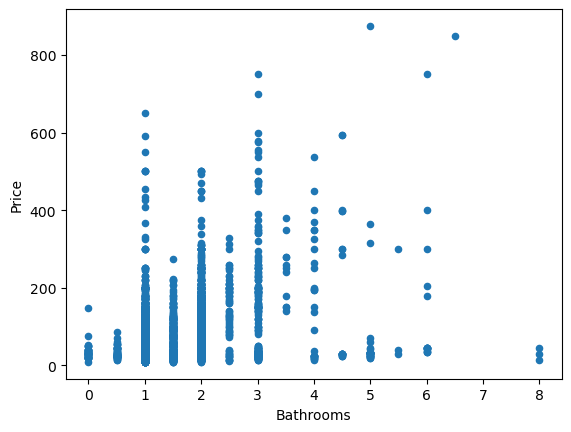

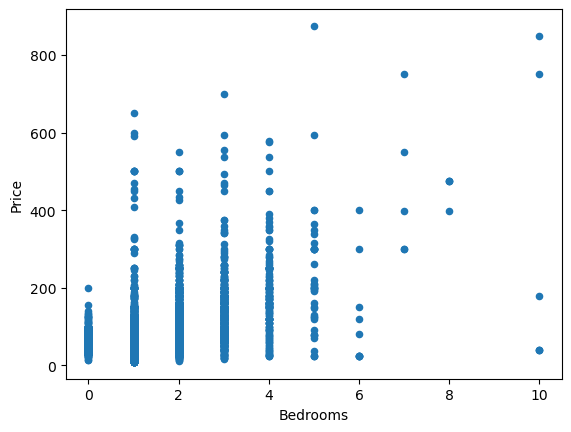

In [26]:
airbnb_data_train.plot(kind = 'scatter',x='Bathrooms',y = 'Price')
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.show()

airbnb_data_train.plot(kind = 'scatter',x='Bedrooms',y = 'Price')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()

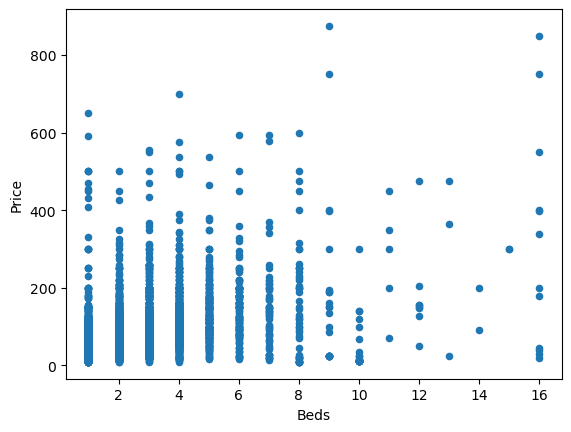

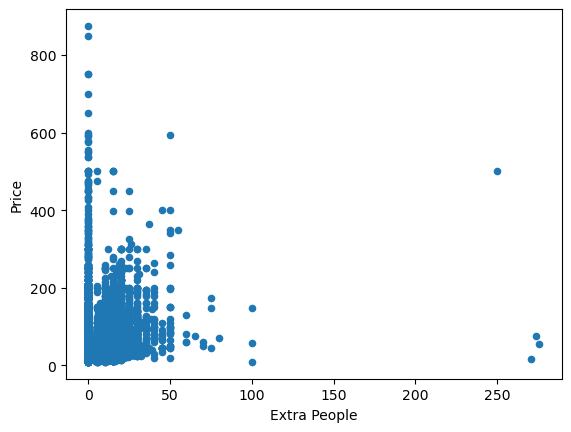

In [27]:
airbnb_data_train.plot(kind = 'scatter',x='Beds',y = 'Price')
plt.xlabel('Beds')
plt.ylabel('Price')
plt.show()

airbnb_data_train.plot(kind = 'scatter',x='Extra People',y = 'Price')
plt.xlabel('Extra People')
plt.ylabel('Price')
plt.show()


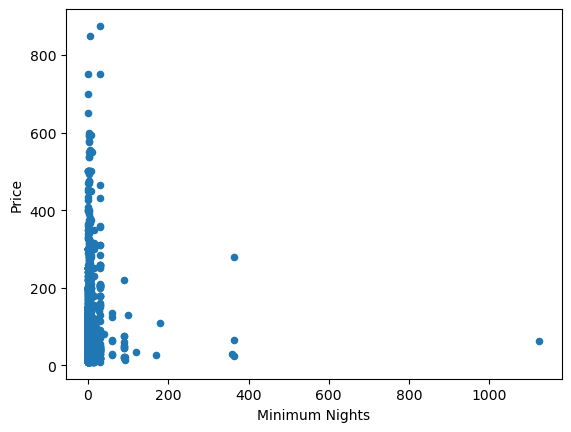

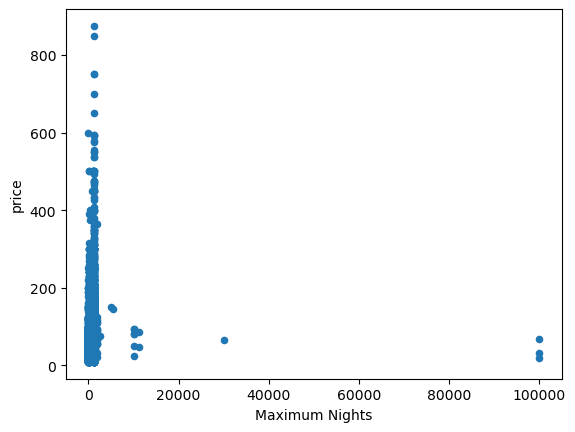

In [28]:
airbnb_data_train.plot(kind = 'scatter',x='Minimum Nights',y = 'Price')
plt.xlabel('Minimum Nights')
plt.ylabel('Price')
plt.show()

airbnb_data_train.plot(kind = 'scatter',x='Maximum Nights',y = 'Price')
plt.xlabel('Maximum Nights')
plt.ylabel('price')
plt.show()

## Eliminación de posibles Outliers

Tras revisar los datos observo que es seria interesante representar algunas columnas en busqueda de outliers.

Columnas a revisar:

Bathrooms, 
Bedrooms, 
Beds, 
Extra people, 
Minimum nights, 
Maximum nights

#### Bedrooms

Original: 10557 // Modificado: 10547
Diferencia: 10
Variación: 0.09%


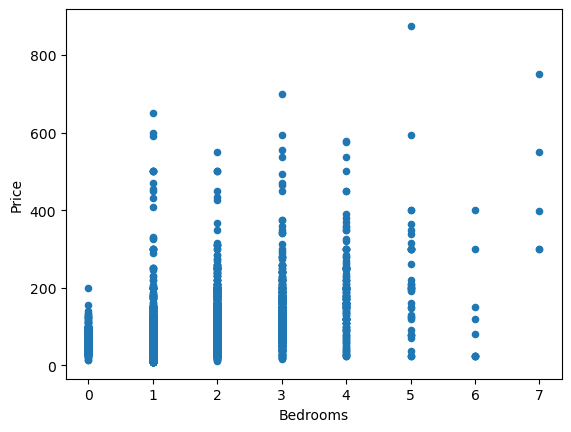

In [29]:
airbnb_data_no_outliers_bedrooms = airbnb_data_train.drop(airbnb_data_train[airbnb_data_train['Bedrooms'] >= 8].index)

print(
    f'Original: {airbnb_data_train.shape[0]} // '
    f'Modificado: {airbnb_data_no_outliers_bedrooms.shape[0]}\nDiferencia: {airbnb_data_train.shape[0] - airbnb_data_no_outliers_bedrooms.shape[0]}'
)
print(f'Variación: {(((airbnb_data_train.shape[0] - airbnb_data_no_outliers_bedrooms.shape[0])/airbnb_data_train.shape[0])*100):.2f}%')

airbnb_data_no_outliers_bedrooms.plot(kind = 'scatter',x='Bedrooms',y = 'Price')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()

In [30]:
airbnb_data_train = airbnb_data_train.drop(airbnb_data_train[airbnb_data_train['Bedrooms'] >= 8].index)

#### Bathrooms

Original: 10547 // Modificado: 10528
Diferencia: 19
Variación: 0.18%


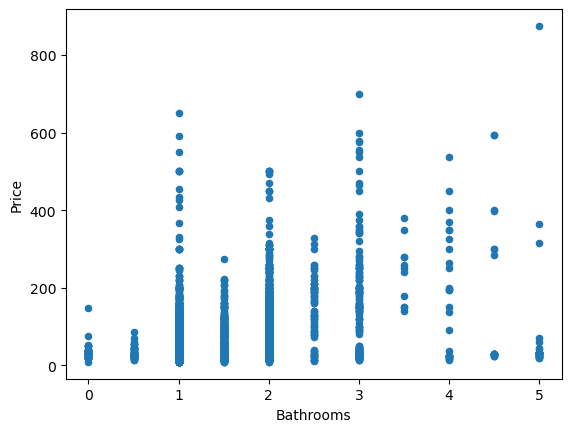

In [31]:
airbnb_data_no_outliers_Bathrooms = airbnb_data_train.drop(airbnb_data_train[airbnb_data_train['Bathrooms'] > 5].index)

print(
    f'Original: {airbnb_data_train.shape[0]} // '
    f'Modificado: {airbnb_data_no_outliers_Bathrooms.shape[0]}\nDiferencia: {airbnb_data_train.shape[0] - airbnb_data_no_outliers_Bathrooms.shape[0]}'
)
print(f'Variación: {(((airbnb_data_train.shape[0] - airbnb_data_no_outliers_Bathrooms.shape[0])/airbnb_data_train.shape[0])*100):.2f}%')

airbnb_data_no_outliers_Bathrooms.plot(kind = 'scatter',x='Bathrooms',y = 'Price')
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.show()

In [32]:
airbnb_data_train = airbnb_data_train.drop(airbnb_data_train[airbnb_data_train['Bathrooms'] > 5].index)

#### Beds

Original: 10528 // Modificado: 10518
Diferencia: 10
Variación: 0.09%


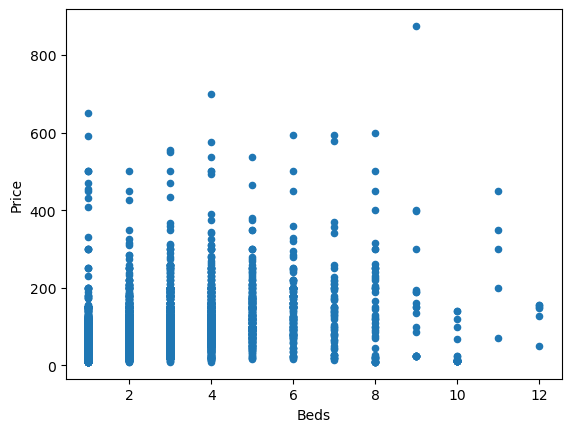

In [33]:
airbnb_data_no_outliers_Beds = airbnb_data_train.drop(airbnb_data_train[airbnb_data_train['Beds'] > 12].index)

print(
    f'Original: {airbnb_data_train.shape[0]} // '
    f'Modificado: {airbnb_data_no_outliers_Beds.shape[0]}\nDiferencia: {airbnb_data_train.shape[0] - airbnb_data_no_outliers_Beds.shape[0]}'
)
print(f'Variación: {(((airbnb_data_train.shape[0] - airbnb_data_no_outliers_Beds.shape[0])/airbnb_data_train.shape[0])*100):.2f}%')

airbnb_data_no_outliers_Beds.plot(kind = 'scatter',x='Beds',y = 'Price')
plt.xlabel('Beds')
plt.ylabel('Price')
plt.show()

In [34]:
airbnb_data_train = airbnb_data_train.drop(airbnb_data_train[airbnb_data_train['Beds'] > 12].index)

#### Extra People

Original: 10518 // Modificado: 10499
Diferencia: 19
Variación: 0.18%


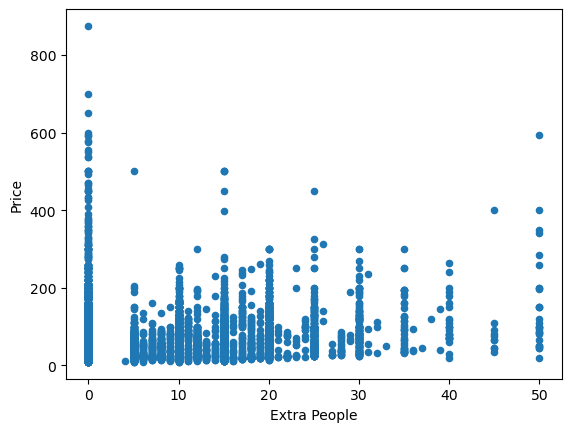

In [35]:
airbnb_data_no_outliers_extra_people = airbnb_data_train.drop(airbnb_data_train[airbnb_data_train['Extra People'] > 50].index)

print(
    f'Original: {airbnb_data_train.shape[0]} // '
    f'Modificado: {airbnb_data_no_outliers_extra_people.shape[0]}\nDiferencia: {airbnb_data_train.shape[0] - airbnb_data_no_outliers_extra_people.shape[0]}'
)
print(f'Variación: {(((airbnb_data_train.shape[0] - airbnb_data_no_outliers_extra_people.shape[0])/airbnb_data_train.shape[0])*100):.2f}%')

airbnb_data_no_outliers_extra_people.plot(kind = 'scatter',x='Extra People',y = 'Price')
plt.xlabel('Extra People')
plt.ylabel('Price')
plt.show()

In [36]:
airbnb_data_train = airbnb_data_train.drop(airbnb_data_train[airbnb_data_train['Extra People'] > 50].index)


#### Minimum Nights 

Original: 10499 // Modificado: 10471
Diferencia: 28
Variación: 0.27%


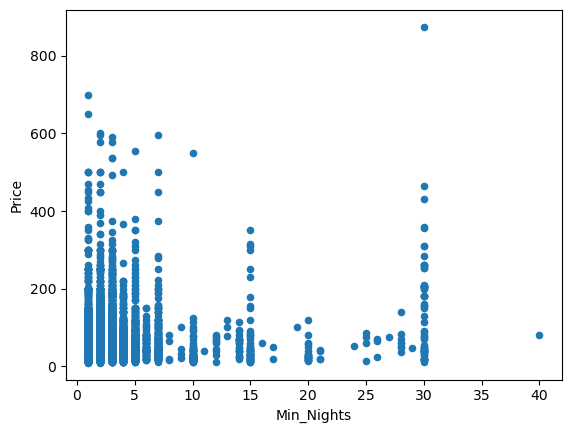

In [37]:
airbnb_data_no_outliers_Min_Nights = airbnb_data_train.drop(airbnb_data_train[airbnb_data_train['Minimum Nights'] > 40].index)

print(
    f'Original: {airbnb_data_train.shape[0]} // '
    f'Modificado: {airbnb_data_no_outliers_Min_Nights.shape[0]}\nDiferencia: {airbnb_data_train.shape[0] - airbnb_data_no_outliers_Min_Nights.shape[0]}'
)
print(f'Variación: {(((airbnb_data_train.shape[0] - airbnb_data_no_outliers_Min_Nights.shape[0])/airbnb_data_train.shape[0])*100):.2f}%')

airbnb_data_no_outliers_Min_Nights.plot(kind = 'scatter',x='Minimum Nights',y = 'Price')
plt.xlabel('Min_Nights')
plt.ylabel('Price')
plt.show()

In [38]:
airbnb_data_train = airbnb_data_train.drop(airbnb_data_train[airbnb_data_train['Minimum Nights'] > 40].index)

#### Maximum Nights

Original: 10471 // Modificado: 10457
Diferencia: 14
Variación: 0.13%


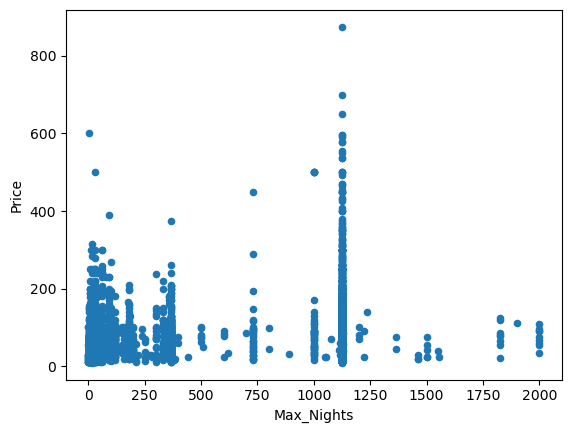

In [39]:
airbnb_data_no_outliers_Max_Nights = airbnb_data_train.drop(airbnb_data_train[airbnb_data_train['Maximum Nights'] > 2000].index)

print(
    f'Original: {airbnb_data_train.shape[0]} // '
    f'Modificado: {airbnb_data_no_outliers_Max_Nights.shape[0]}\nDiferencia: {airbnb_data_train.shape[0] - airbnb_data_no_outliers_Max_Nights.shape[0]}'
)
print(f'Variación: {(((airbnb_data_train.shape[0] - airbnb_data_no_outliers_Max_Nights.shape[0])/airbnb_data_train.shape[0])*100):.2f}%')

airbnb_data_no_outliers_Max_Nights.plot(kind = 'scatter',x='Maximum Nights',y = 'Price')
plt.xlabel('Max_Nights')
plt.ylabel('Price')
plt.show()

In [40]:
airbnb_data_train = airbnb_data_train.drop(airbnb_data_train[airbnb_data_train['Maximum Nights'] > 2000].index)

In [41]:
airbnb_data_train.shape

(10457, 34)

## Tratamiento de Nulos

Algunas de las variables tienen valores ausentes por lo que vamos a imputar en estos registros los valores de la media o la moda segun la variable que estemos tratando

In [42]:
# Creo una lista con las columnas que contienen nulos
nulos_por_columna = airbnb_data_train.isna().sum()
columnas_con_nulos = nulos_por_columna[nulos_por_columna > 0].index.tolist()
columnas_con_nulos

['Bathrooms',
 'Bedrooms',
 'Beds',
 'Security Deposit',
 'Cleaning Fee',
 'Review Scores Rating',
 'Review Scores Accuracy',
 'Review Scores Cleanliness',
 'Review Scores Checkin',
 'Review Scores Communication',
 'Review Scores Location',
 'Review Scores Value',
 'Reviews per Month']

In [43]:
moda_column = ['Bathrooms', 'Bedrooms', 'Beds']

for col in moda_column:
    moda = airbnb_data_train[col].mode()[0]  # Calculo la moda de la columna
    airbnb_data_train[col].fillna(moda, inplace=True)  # Relleno nulos con la moda

In [44]:
media_column = ['Security Deposit', 'Cleaning Fee', 'Review Scores Rating', 'Review Scores Accuracy', 'Review Scores Cleanliness', 
                'Review Scores Checkin','Review Scores Communication','Review Scores Location','Review Scores Value','Reviews per Month']

for col in media_column:
    media = airbnb_data_train[col].mean()  # Calcular la media de la columna
    airbnb_data_train[col].fillna(media, inplace=True)  # Relleno nulos con la media

Compruebo tras imputación de valores.

In [45]:
airbnb_data_train.isna().sum() # Compruebo que ninguna columna tiene valores nulos

Price_sqrt                        0
Price_log                         0
Price                             0
Neighbourhood Group Cleansed      0
Latitude                          0
Longitude                         0
Property Type                     0
Room Type                         0
Accommodates                      0
Bathrooms                         0
Bedrooms                          0
Beds                              0
Bed Type                          0
Security Deposit                  0
Cleaning Fee                      0
Guests Included                   0
Extra People                      0
Minimum Nights                    0
Maximum Nights                    0
Availability 30                   0
Availability 60                   0
Availability 90                   0
Availability 365                  0
Number of Reviews                 0
Review Scores Rating              0
Review Scores Accuracy            0
Review Scores Cleanliness         0
Review Scores Checkin       

## Variables categóricas

In [46]:
# Lista de todas las columnas que son de tipo 'object'
categorical_column = airbnb_data_train.select_dtypes(include=['object']).columns.tolist()
categorical_column

['Neighbourhood Group Cleansed',
 'Property Type',
 'Room Type',
 'Bed Type',
 'Cancellation Policy']

In [47]:
!pip install category_encoders

In [48]:
from category_encoders import TargetEncoder

# Inicializo el TargetEncoder
encoder = TargetEncoder()

# Codificación de las variables categoricas 
airbnb_data_train[categorical_column] = encoder.fit_transform(airbnb_data_train[categorical_column], airbnb_data_train['Price'])

In [49]:
airbnb_data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10457 entries, 0 to 10564
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Price_sqrt                      10457 non-null  float64
 1   Price_log                       10457 non-null  float64
 2   Price                           10457 non-null  float64
 3   Neighbourhood Group Cleansed    10457 non-null  float64
 4   Latitude                        10457 non-null  float64
 5   Longitude                       10457 non-null  float64
 6   Property Type                   10457 non-null  float64
 7   Room Type                       10457 non-null  float64
 8   Accommodates                    10457 non-null  int64  
 9   Bathrooms                       10457 non-null  float64
 10  Bedrooms                        10457 non-null  float64
 11  Beds                            10457 non-null  float64
 12  Bed Type                        10457

## Matriz de correlación

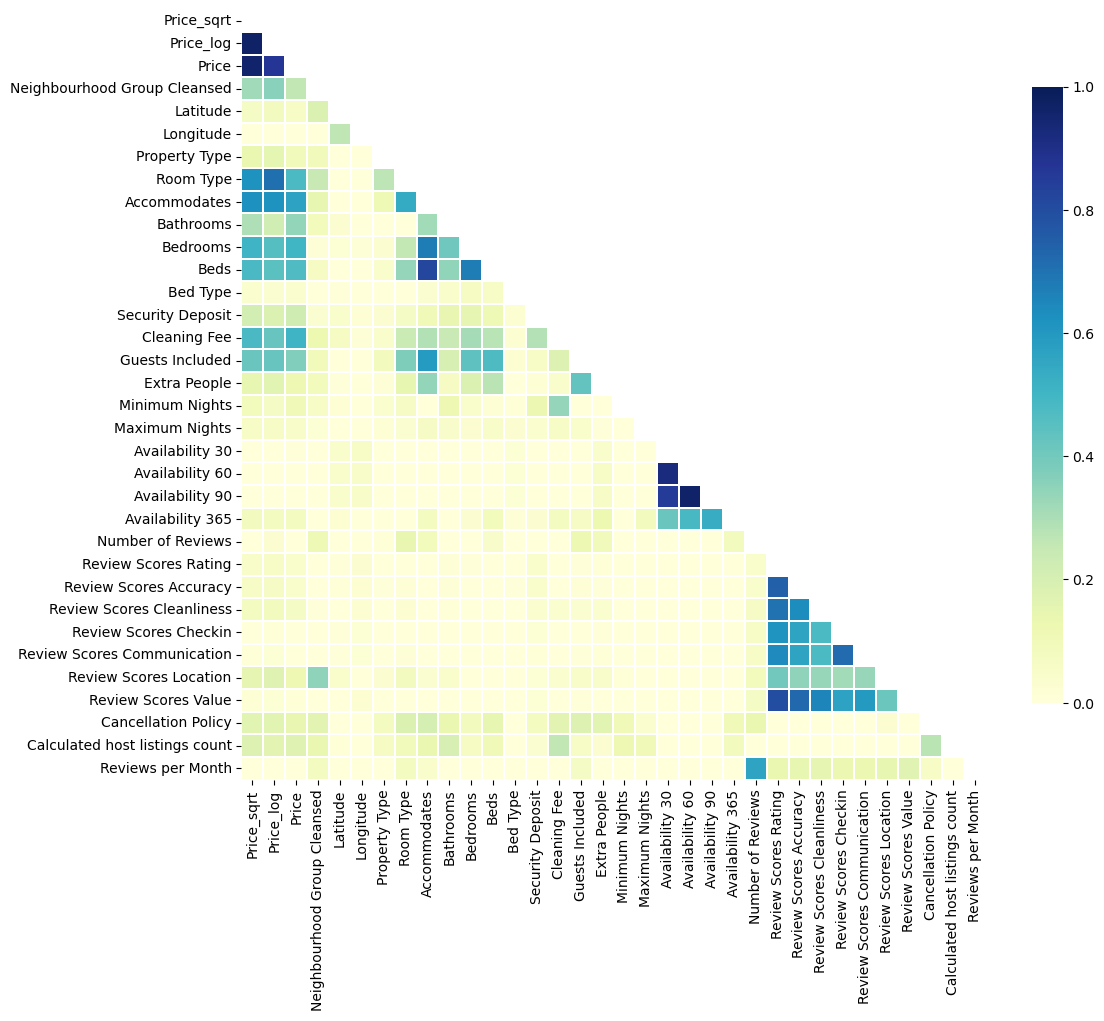

In [50]:
import seaborn as sns

# Calla matriz de correlación.
corr = airbnb_data_train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

### Eliminación de variables correladas

En este punto elimino aquellas variables que guardan una gran correlación con otras.

Anteriormente hemos creado dos variables nuevas, Price_log y Price_sqrt y hemos decidido quedarnos con Price_log

Accommodates guarda gran correlación con beds. Decido quedar con accommodates a la vista de los datos que aporta por que considero que son de más importancia que el número de camas.

De las columnas Availability, me quedo unicamente con Availability 30 y Availability 365.

Decido prescindir de Review Scores Value por que guarda correlacion con Review Scores Rating pero este ultimo parece tener valores de mas relevancia

In [51]:
# Elimino columnas con alta correlación
airbnb_data_train = airbnb_data_train.drop(columns = 'Price')
airbnb_data_train = airbnb_data_train.drop(columns = 'Price_sqrt')
airbnb_data_train = airbnb_data_train.drop(columns = 'Beds')
airbnb_data_train = airbnb_data_train.drop(columns = 'Availability 60')
airbnb_data_train = airbnb_data_train.drop(columns = 'Availability 90')
airbnb_data_train = airbnb_data_train.drop(columns = 'Review Scores Value')


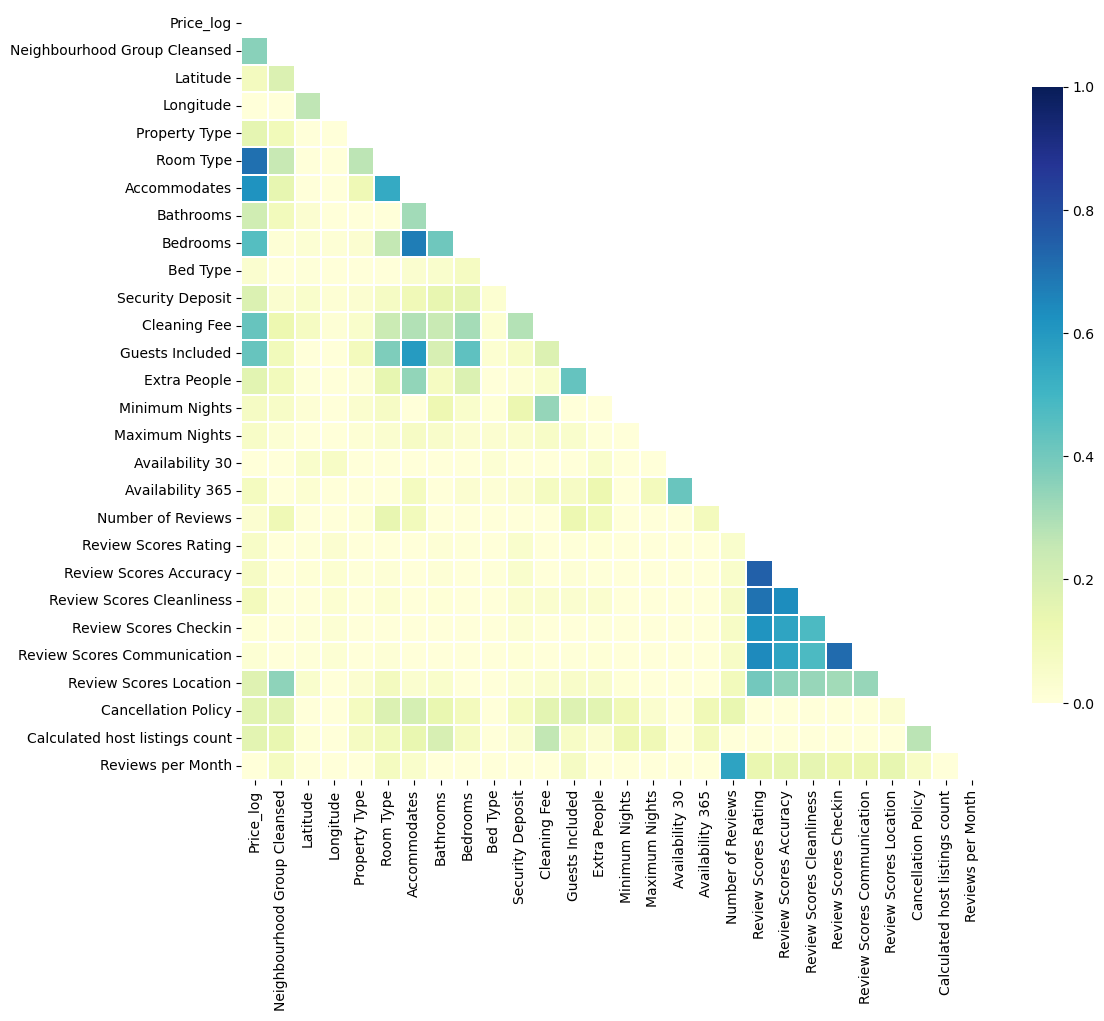

In [52]:
import seaborn as sns

# Compute the correlation matrix
corr = airbnb_data_train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

## Preparación de modelo train y test

Combino en una unica celda todo el procesamiento anterior

In [53]:
# Cargo datos Train
train_airbnb = pd.read_csv('airbnb-listings-extract_train.csv', sep=';', decimal='.')


# Elimino columnas iniciales
train_airbnb = train_airbnb.drop(columns=columns_to_drop)


# Elimino columnas que tiene exceso de NaN
train_airbnb = train_airbnb.drop(columns = 'Has Availability')
train_airbnb = train_airbnb.drop(columns = 'Square Feet')
train_airbnb = train_airbnb.drop(columns = 'Weekly Price')
train_airbnb = train_airbnb.drop(columns = 'Monthly Price')


# Elimino los registros de que no tienen valor para la columna objetivo (Price)
train_airbnb = train_airbnb.dropna(subset=["Price"])
train_airbnb.isna().sum()


# Elimino Outliers
train_airbnb = train_airbnb.drop(train_airbnb[train_airbnb['Bedrooms'] >= 8].index)
train_airbnb = train_airbnb.drop(train_airbnb[train_airbnb['Bathrooms'] > 5].index)
train_airbnb = train_airbnb.drop(train_airbnb[train_airbnb['Beds'] > 12].index)
train_airbnb = train_airbnb.drop(train_airbnb[train_airbnb['Extra People'] > 50].index)
train_airbnb = train_airbnb.drop(train_airbnb[train_airbnb['Minimum Nights'] > 40].index)
train_airbnb = train_airbnb.drop(train_airbnb[train_airbnb['Maximum Nights'] > 2000].index)


# Tratamiento de nulos
moda_column = ['Bathrooms', 'Bedrooms', 'Beds']

for col in moda_column:
    moda = train_airbnb[col].mode()[0]  # Calculo la moda de la columna
    train_airbnb[col].fillna(moda, inplace=True)  # Relleno nulos con la moda

media_column = ['Security Deposit', 'Cleaning Fee', 'Review Scores Rating', 'Review Scores Accuracy', 'Review Scores Cleanliness', 
                'Review Scores Checkin','Review Scores Communication','Review Scores Location','Review Scores Value','Reviews per Month']

for col in media_column:
    media = train_airbnb[col].mean()  # Calcular la media de la columna
    train_airbnb[col].fillna(media, inplace=True)  # Relleno nulos con la media


# Convierto Price a logaritmico

train_airbnb['Price_log'] = np.log(train_airbnb['Price'])

# Coloco la variable objetivo en primera posición

# Obtener la lista de columnas
cols = list(train_airbnb.columns)

# Mover la columna 'Price' al inicio
cols.insert(0, cols.pop(cols.index('Price_log')))

# Reorganizar el DataFrame con las nuevas posiciones de las columnas
train_airbnb = train_airbnb[cols]


# Codificacion de variables categoricas

# Inicializo el TargetEncoder
encoder = TargetEncoder()

# Codificación de las variables categoricas 
train_airbnb[categorical_column] = encoder.fit_transform(train_airbnb[categorical_column], train_airbnb['Price'])

# Elimino columnas con alta correlacion
train_airbnb = train_airbnb.drop(columns = 'Price')
train_airbnb = train_airbnb.drop(columns = 'Beds')
train_airbnb = train_airbnb.drop(columns = 'Availability 60')
train_airbnb = train_airbnb.drop(columns = 'Availability 90')
train_airbnb = train_airbnb.drop(columns = 'Review Scores Value')

In [54]:
# Cargo datos Test
test_airbnb = pd.read_csv('airbnb-listings-extract_test.csv', sep=';', decimal='.')


# Elimino columnas iniciales
test_airbnb = test_airbnb.drop(columns=columns_to_drop)


# Elimino columnas que tiene exceso de NaN
test_airbnb = test_airbnb.drop(columns = 'Has Availability')
test_airbnb = test_airbnb.drop(columns = 'Square Feet')
test_airbnb = test_airbnb.drop(columns = 'Weekly Price')
test_airbnb = test_airbnb.drop(columns = 'Monthly Price')


# Elimino los registros de que no tienen valor para la columna objetivo (Price)
test_airbnb = test_airbnb.dropna(subset=["Price"])
test_airbnb.isna().sum()


# Elimino Outliers
test_airbnb = test_airbnb.drop(test_airbnb[test_airbnb['Bedrooms'] >= 8].index)
test_airbnb = test_airbnb.drop(test_airbnb[test_airbnb['Bathrooms'] > 5].index)
test_airbnb = test_airbnb.drop(test_airbnb[test_airbnb['Beds'] > 12].index)
test_airbnb = test_airbnb.drop(test_airbnb[test_airbnb['Extra People'] > 50].index)
test_airbnb = test_airbnb.drop(test_airbnb[test_airbnb['Minimum Nights'] > 40].index)
test_airbnb = test_airbnb.drop(test_airbnb[test_airbnb['Maximum Nights'] > 2000].index)


# Tratamiento de nulos
moda_column = ['Bathrooms', 'Bedrooms', 'Beds']

for col in moda_column:
    moda = test_airbnb[col].mode()[0]  # Calculo la moda de la columna
    test_airbnb[col].fillna(moda, inplace=True)  # Relleno nulos con la moda

media_column = ['Security Deposit', 'Cleaning Fee', 'Review Scores Rating', 'Review Scores Accuracy', 'Review Scores Cleanliness', 
                'Review Scores Checkin','Review Scores Communication','Review Scores Location','Review Scores Value','Reviews per Month']

for col in media_column:
    media = test_airbnb[col].mean()  # Calcular la media de la columna
    test_airbnb[col].fillna(media, inplace=True)  # Relleno nulos con la media


# Convierto Price a logaritmico

test_airbnb['Price_log'] = np.log(test_airbnb['Price'])

# Coloco la variable objetivo en primera posición

# Obtener la lista de columnas
cols = list(test_airbnb.columns)

# Mover la columna 'Price' al inicio
cols.insert(0, cols.pop(cols.index('Price_log')))

# Reorganizar el DataFrame con las nuevas posiciones de las columnas
test_airbnb = test_airbnb[cols]

# Codificacion de variables categoricas
# Inicializo el TargetEncoder
encoder = TargetEncoder()

# Codificación de las variables categoricas 
test_airbnb[categorical_column] = encoder.fit_transform(test_airbnb[categorical_column], test_airbnb['Price'])

# Elimino columnas con alta correlacion
test_airbnb = test_airbnb.drop(columns = 'Price')
test_airbnb = test_airbnb.drop(columns = 'Beds')
test_airbnb = test_airbnb.drop(columns = 'Availability 60')
test_airbnb = test_airbnb.drop(columns = 'Availability 90')
test_airbnb = test_airbnb.drop(columns = 'Review Scores Value')

In [58]:
test_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2616 entries, 0 to 2641
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Price_log                       2616 non-null   float64
 1   Neighbourhood Group Cleansed    2616 non-null   float64
 2   Latitude                        2616 non-null   float64
 3   Longitude                       2616 non-null   float64
 4   Property Type                   2616 non-null   float64
 5   Room Type                       2616 non-null   float64
 6   Accommodates                    2616 non-null   int64  
 7   Bathrooms                       2616 non-null   float64
 8   Bedrooms                        2616 non-null   float64
 9   Bed Type                        2616 non-null   float64
 10  Security Deposit                2616 non-null   float64
 11  Cleaning Fee                    2616 non-null   float64
 12  Guests Included                 2616 no

## Preparo datos para Sklearn

In [62]:
from sklearn import preprocessing

# Dataset de train
data_train = train_airbnb.values
y_train = data_train[:,0:1]     # nos quedamos con la 1ª columna, Price_log
X_train = data_train[:,1:]      # nos quedamos con el resto

# Dataset de test
data_test = test_airbnb.values
y_test = data_test[:,0:1]     # nos quedamos con la 1ª columna, Price_log
X_test = data_test[:,1:]      # nos quedamos con el resto

# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)
XtestScaled = scaler.transform(X_test) 

print('Datos entrenamiento: ', XtrainScaled.shape)
print('Datos test: ', XtestScaled.shape)

Datos entrenamiento:  (10457, 27)
Datos test:  (2616, 27)


## Modelos

### Lasso

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................alpha=0.37926901907322497; total time=   0.0s
[CV] END ..........................alpha=0.37926901907322497; total time=   0.0s
[CV] END ..........................alpha=0.37926901907322497; total time=   0.0s
[CV] END ............................alpha=1.438449888287663; total time=   0.0s
[CV] END ............................alpha=1.438449888287663; total time=   0.0s
[CV] END ............................alpha=1.438449888287663; total time=   0.0s
[CV] END .............................alpha=5.45559478116852; total time=   0.0s
[CV] END .............................alpha=5.45559478116852; total time=   0.0s
[CV] END .............................alpha=5.45

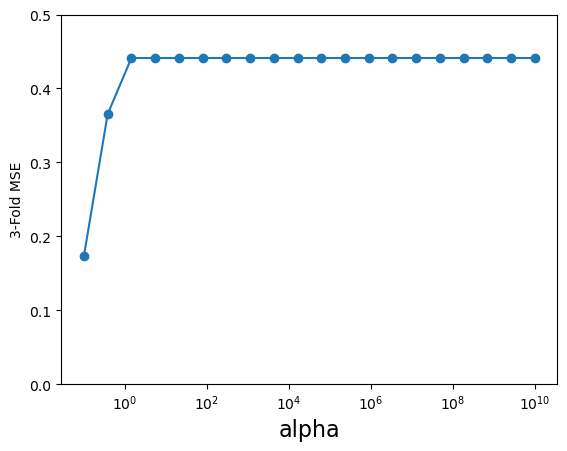

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alpha_vector = np.logspace(-1,10,20)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 3, verbose=2)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('3-Fold MSE')
plt.ylim((0, 0.5))
plt.show()

In [64]:
from sklearn.metrics import mean_squared_error

alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train)

ytrainLasso = lasso.predict(XtrainScaled)
ytestLasso  = lasso.predict(XtestScaled)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

feature_names = airbnb_data_train.columns[1:] # es igual en train y en test

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

MSE Modelo Lasso (train): 0.173
MSE Modelo Lasso (test) : 0.177
RMSE Modelo Lasso (train): 0.416
RMSE Modelo Lasso (test) : 0.421
Neighbourhood Group Cleansed 0.04451044812393888
Latitude 0.0
Longitude -0.0
Property Type 0.0
Room Type 0.2706205509548213
Accommodates 0.11368015434871953
Bathrooms 0.0
Bedrooms 0.03764633092994081
Bed Type 0.0
Security Deposit 0.0
Cleaning Fee 0.06687385208251803
Guests Included 0.0
Extra People 0.0
Minimum Nights 0.0
Maximum Nights 0.0
Availability 30 0.0
Availability 365 0.0
Number of Reviews -0.0
Review Scores Rating 0.0
Review Scores Accuracy 0.0
Review Scores Cleanliness 0.0
Review Scores Checkin 0.0
Review Scores Communication 0.0
Review Scores Location 0.0
Cancellation Policy 0.0
Calculated host listings count 0.0
Reviews per Month -0.0


### Modelo KNeighborsRegressor

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=4; total time=   0.0s
[CV] END ......................................n_neighbors=4; total time=   0.0s
[CV] END ......................................n

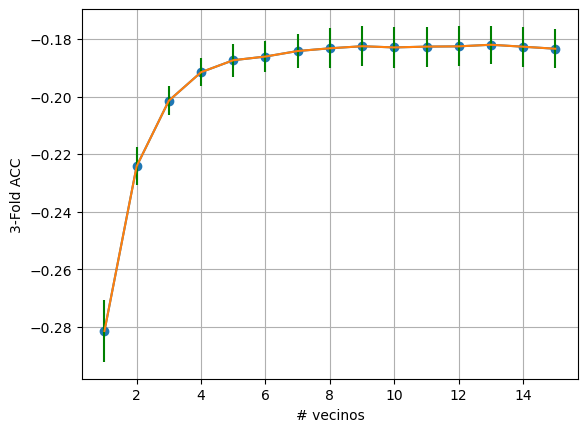

In [94]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

nVecinos = range(1,16)

param_grid = {
    'n_neighbors':  np.arange(1, 16, 1),
}
grid = GridSearchCV(KNeighborsRegressor(), scoring='neg_mean_squared_error', param_grid=param_grid, cv = 3, verbose=2)
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(-grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score']) #¡cuidado, lo llaman test cuando es validación!
stdvalues = np.array(grid.cv_results_['std_test_score'])
plt.plot(np.arange(1, 16, 1),scores,'-o')
plt.errorbar(nVecinos, scores, yerr=stdvalues, ecolor='g')
plt.xlabel('# vecinos')
plt.ylabel('3-Fold ACC')
plt.grid()
plt.show()

In [95]:
n_neighbours = grid.best_params_['n_neighbors']
knn = KNeighborsRegressor(n_neighbors= n_neighbours).fit(X_train, y_train)

train_score = knn.score(X_train, y_train)
test_score = knn.score(X_test, y_test)

print("Best train score: {:.3f}".format(train_score))
print("Best test score: {:.3f}".format(test_score))

Best train score: 0.664
Best test score: 0.612


### Random forest

Fitting 3 folds for each of 19 candidates, totalling 57 fits
[CV] END ........................................max_depth=1; total time=   0.2s
[CV] END ........................................max_depth=1; total time=   0.2s
[CV] END ........................................max_depth=1; total time=   0.2s
[CV] END ........................................max_depth=2; total time=   0.3s
[CV] END ........................................max_depth=2; total time=   0.3s
[CV] END ........................................max_depth=2; total time=   0.3s
[CV] END ........................................max_depth=3; total time=   0.4s
[CV] END ........................................max_depth=3; total time=   0.4s
[CV] END ........................................max_depth=3; total time=   0.4s
[CV] END ........................................max_depth=4; total time=   0.5s
[CV] END ........................................max_depth=4; total time=   0.5s
[CV] END .......................................

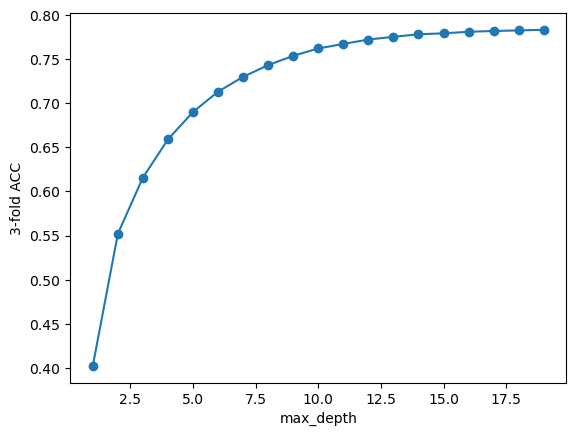

In [65]:
from sklearn.ensemble import RandomForestRegressor

maxDepth = range(1,20)
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt'), param_grid=tuned_parameters,cv=3, verbose=2) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('3-fold ACC')

plt.show()

In [66]:
maxDepthOptimo = grid.best_params_['max_depth']
randomForest = RandomForestRegressor(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt').fit(X_train,y_train)

print("Train: ",randomForest.score(X_train,y_train))
print("Test: ",randomForest.score(X_test,y_test))

Train:  0.9537662718158104
Test:  0.7770022633403003


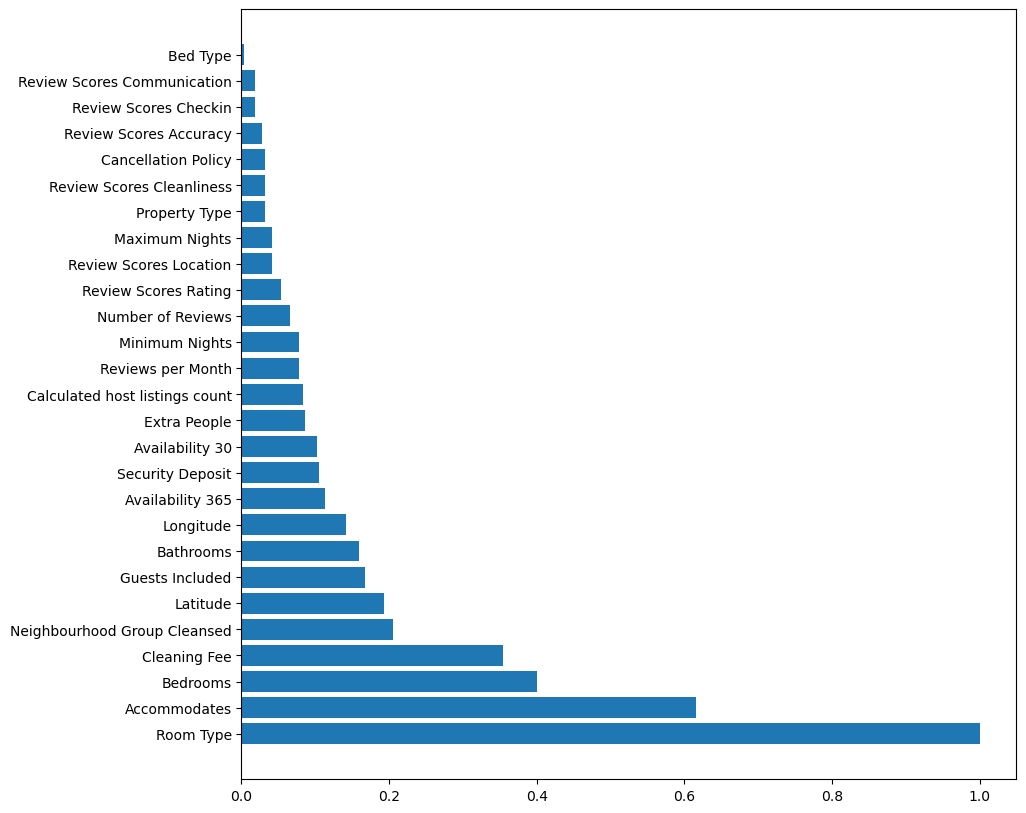

In [67]:
importances = randomForest.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()

### Bagging regressor

Fitting 3 folds for each of 14 candidates, totalling 42 fits
[CV] END ........................base_estimator__max_depth=1; total time=   0.7s
[CV] END ........................base_estimator__max_depth=1; total time=   0.8s
[CV] END ........................base_estimator__max_depth=1; total time=   0.8s
[CV] END ........................base_estimator__max_depth=2; total time=   1.3s
[CV] END ........................base_estimator__max_depth=2; total time=   1.5s
[CV] END ........................base_estimator__max_depth=2; total time=   1.4s
[CV] END ........................base_estimator__max_depth=3; total time=   1.9s
[CV] END ........................base_estimator__max_depth=3; total time=   1.9s
[CV] END ........................base_estimator__max_depth=3; total time=   1.9s
[CV] END ........................base_estimator__max_depth=4; total time=   2.6s
[CV] END ........................base_estimator__max_depth=4; total time=   2.4s
[CV] END ........................base_estimator_

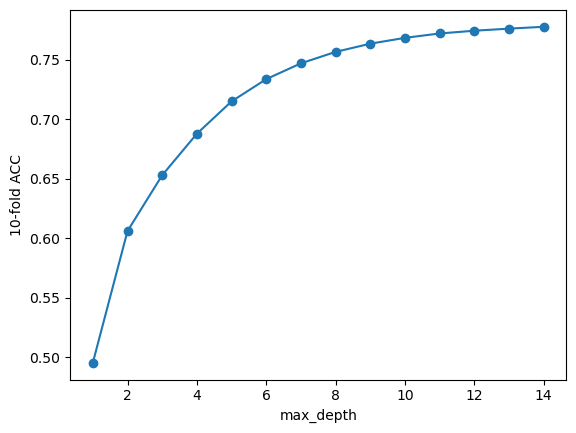

In [70]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

maxDepth = range(1,15)
tuned_parameters = {'base_estimator__max_depth': maxDepth}

grid = GridSearchCV(BaggingRegressor(estimator=DecisionTreeRegressor(), random_state=0, n_estimators=200), param_grid=tuned_parameters, cv=3, verbose=2)
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

In [71]:
maxDepthOptimo = grid.best_params_['base_estimator__max_depth']
baggingModel = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=maxDepthOptimo),n_estimators=200).fit(X_train,y_train)

print("Train: ",baggingModel.score(X_train,y_train))
print("Test: ",baggingModel.score(X_test,y_test))

Train:  0.926735912922947
Test:  0.7718022224596311


### GradientBoostingRegressor

In [91]:
from sklearn.ensemble import GradientBoostingRegressor

Niterations = [500,1000,1500,2000]
learningRate = [0.1,0.05]
# mantenemos max_depth estático: max_depth=3

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=3), param_grid=param_grid, cv = 3, verbose=2)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END ................learning_rate=0.1, n_estimators=500; total time=   6.4s
[CV] END ................learning_rate=0.1, n_estimators=500; total time=   6.4s
[CV] END ................learning_rate=0.1, n_estimators=500; total time=   6.5s
[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=  13.0s
[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=  12.8s
[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=  12.9s
[CV] END ...............learning_rate=0.1, n_estimators=1500; total time=  19.3s
[CV] END ...............learning_rate=0.1, n_estimators=1500; total time=  19.3s
[CV] END ...............learning_rate=0.1, n_estimators=1500; total time=  19.3s
[CV] END ...............learning_rate=0.1, n_estimators=2000; total time=  25.9s
[CV] END ...............learning_rate=0.1, n_estimators=2000; total time=  25.8s
[CV] END ...............learning_rate=0.1, n_esti

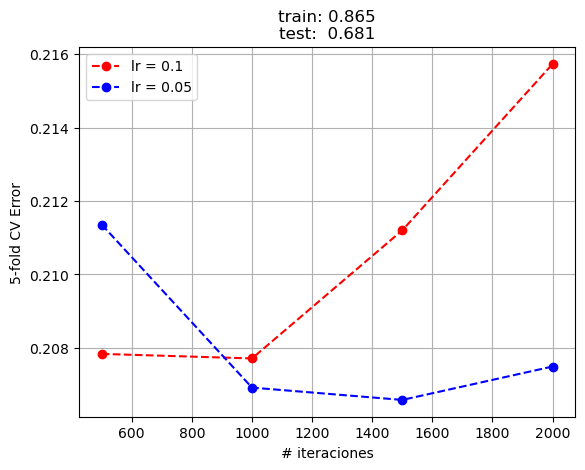

In [92]:
lrOptimo = grid.best_params_['learning_rate']
neOptimo = grid.best_params_['n_estimators']
bt = GradientBoostingRegressor(random_state=0, max_depth=3,learning_rate=lrOptimo, n_estimators=neOptimo)
bt.fit(X_train,y_train)

error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(X_train,y_train),bt.score(X_test,y_test)))
plt.grid()
plt.show()

In [93]:
lrOptimo = grid.best_params_['learning_rate']
neOptimo = grid.best_params_['n_estimators']
baggingModel = GradientBoostingRegressor(max_depth=3, n_estimators=neOptimo, learning_rate=lrOptimo).fit(X_train,y_train)

print("Train: ",baggingModel.score(X_train,y_train))
print("Test: ",baggingModel.score(X_test,y_test))

Train:  0.8654220731782837
Test:  0.6919278042580845
